In [1]:
import numpy as np
from random import uniform, choice
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_xys(xy_l_tuples,sz=15):
    t_yes = [a[0] for a in xy_l_tuples if a[1] == 1]
    t_no = [a[0] for a in xy_l_tuples if a[1] == 0]
    plt.plot([x for (x,y) in t_yes],[y for (x,y) in t_yes],'go',markersize=sz)
    plt.plot([x for (x,y) in t_no],[y for (x,y) in t_no],'ro',markersize=sz)

In [3]:
def tuple_append(tpl,elt):
    return tuple(list(tpl)+[elt])

def perceptron(training, epochs):
    # some parameters, maybe interesting to make these arguments
    rate = 1.0
    # how many weights do we need?
    feature_count = len(training[0][0])
    # pad each training example with a dummy 1 input
    training = [(tuple_append(ins,1), label) for (ins,label) in training]
    # initialize weights to random values
    weights = [uniform(0,0.05) for _r in range(0,feature_count+1)]
    # let's store the errors found during training
    errors = []
    for i in range(0,epochs):
        # in each epoch, pick a subset of the training set (just one for now)
        (example,actual) = choice(training)
        # calculate the perceptron activation and the predicted category
        activation = np.dot(weights, example) 
        predicted = 1 if activation >= 0 else 0
        error = actual - predicted        
        for i in range(0, len(weights)):
            weights[i] += example[i] * error
        errors.append(error)
        # Note: You can use dot(vec1, vec2) to get the dot product between two sequential collections.
        # calculate the error between predicted and actual and add it to errors
        # update each weight according to the perceptron update rule
    return (errors,weights)

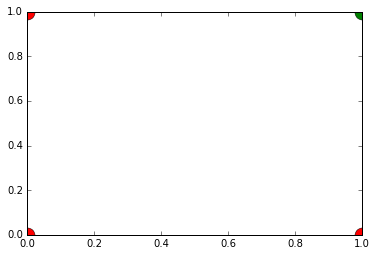

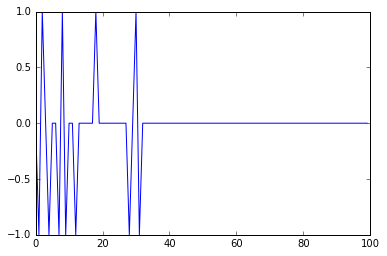

In [4]:
and_set = [((0,0),0), ((0,1),0), ((1,0),0), ((1,1),1)]
plot_xys(and_set)

(errs,_) = perceptron(and_set,100)
plt.figure()
plt.plot(errs)

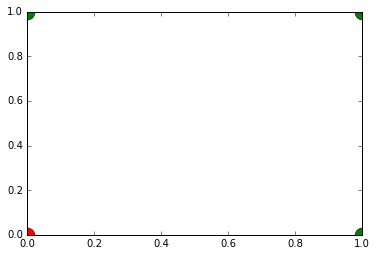

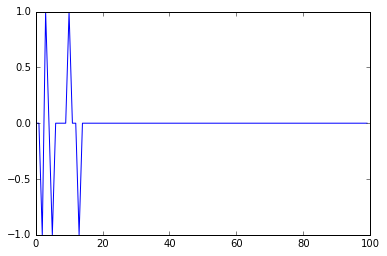

In [5]:
or_set = [((0,0),0), ((0,1),1), ((1,0),1), ((1,1),1)]
plot_xys(or_set)

(errs,_) = perceptron(or_set,100)
plt.figure()
plt.plot(errs)

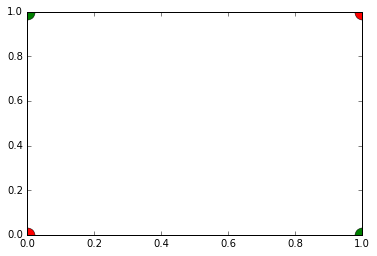

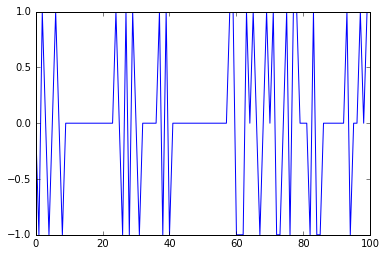

In [6]:
xor_set = [((0,0),0), ((0,1),1), ((1,0),1), ((1,1),0)]
plot_xys(xor_set)

(errs,_) = perceptron(xor_set,100)
plt.figure()
plt.plot(errs)

Validation error: 0.02


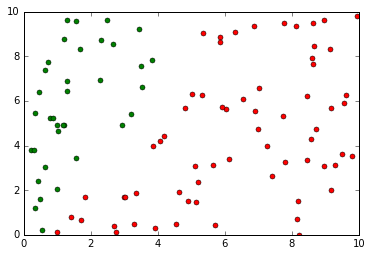

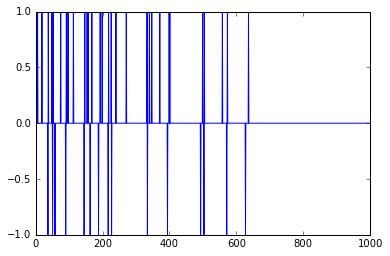

In [8]:
noise_chance = 0.0
N = 100
xys = [(uniform(0,10),uniform(0,10)) for _r in range(0,N)]
secret_f = lambda x: x*2 - 1
dataset = [(xy,(1 if (secret_f(xy[0]) <= xy[1] or uniform(0,1)<noise_chance) else 0)) for xy in xys]
plot_xys(dataset,5)

trials = 1000
(errs,weights) = perceptron(dataset,trials)
plt.figure()
plt.plot(errs)

validation_N = 100
# note the bounds here are a bit different, but we hope to generalize a bit from the training set
val_xys = [(uniform(5,20),uniform(5,20)) for _r in range(0,validation_N)]
validation = [(tuple_append(xy,1),(1 if secret_f(xy[0]) <= xy[1] else 0)) for xy in val_xys]
val_net_error = 0
for (example,actual) in validation:
    # get the prediction based on the weights, calculate the (absolute) error and add it to the net error
    activation = np.dot(weights, example) 
    predicted = 1 if activation >= 0 else 0
    error = actual - predicted   
    val_net_error += abs(error)
val_error = val_net_error/len(validation)
print("Validation error:",val_error)